<center><b> Monte Carlo Simulation of Stock Returns </b></center>


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
def fetchData(tickers, start, end):
    dailyReturns = pd.DataFrame(columns=tickers)

    plt.figure(figsize=(15, 12))
    plt.suptitle("Closing Prices")

    for n, ticker in enumerate(tickers):
        data = yf.download(ticker, start=start, end=end)
        dailyReturns[ticker] = data['Adj Close']

        ax = plt.subplot(round(len(tickers)/2), round(len(tickers)/3), n+1)

        dailyReturns[ticker].plot()

        ax.set_title(ticker)
        ax.set_xlabel("")

    plt.show()
    return dailyReturns

def computeParameters(dailyReturns, numPeriods, numSimulations, tickers):
    returnDf = pd.DataFrame(columns=tickers)
    logReturns = np.log(1 + dailyReturns.pct_change())
    drift = logReturns.mean() - 0.5 * logReturns.var()
    stddev = logReturns.std()

    for n, ticker in enumerate(tickers):
        returns = np.exp(drift[n] + stddev[n] * norm.ppf(np.random.rand(numPeriods, numSimulations))).tolist()
        returnDf[ticker] = returns
    return returnDf


def monteCarloSim(returns, dailyReturns):
    plt.figure(figsize=(15, 12))
    for n, ticker in enumerate(tickers):
        S0 = dailyReturns[ticker]
        initalPrice = S0.iloc[-1]

        daily_Returns = returns[ticker].values

        price_list = np.zeros((numPeriods, numSimulations))
        price_list[0] = initalPrice

        for t in range(1, numPeriods):
            price_list[t] = price_list[t - 1] * daily_Returns[t]

        meanReturn = round(pd.DataFrame(price_list).iloc[-1].mean(), 2)
        ax = plt.subplot(round(len(tickers)/2), 2, n + 1)
        plt.plot(pd.DataFrame(price_list).iloc[:, 0:1000])
        ax.set_title(ticker)
        ax.set_xlabel(f"Expected {numPeriods} Day Return: ${meanReturn}")
    plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


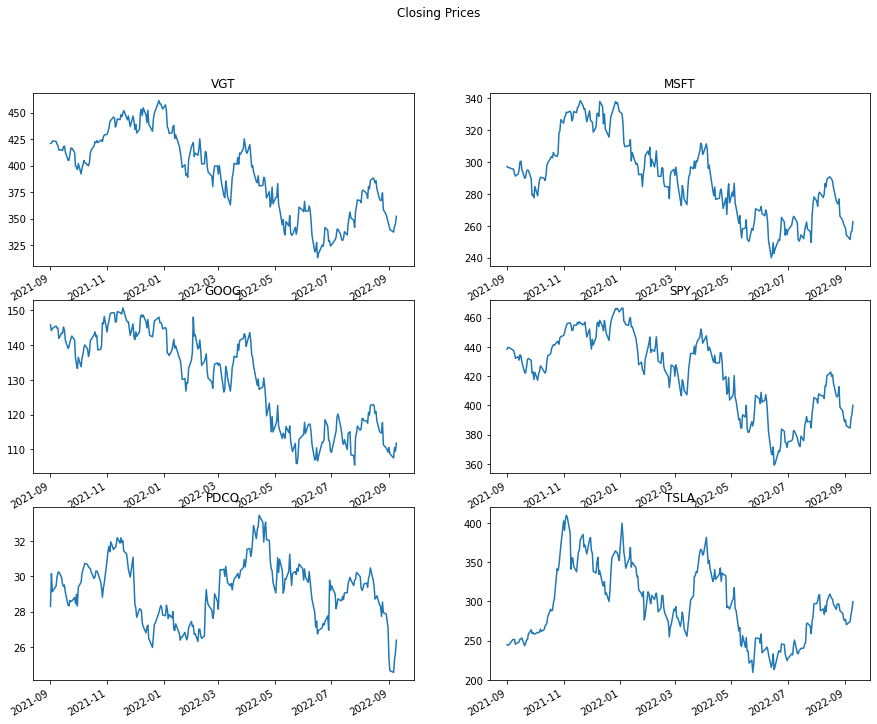

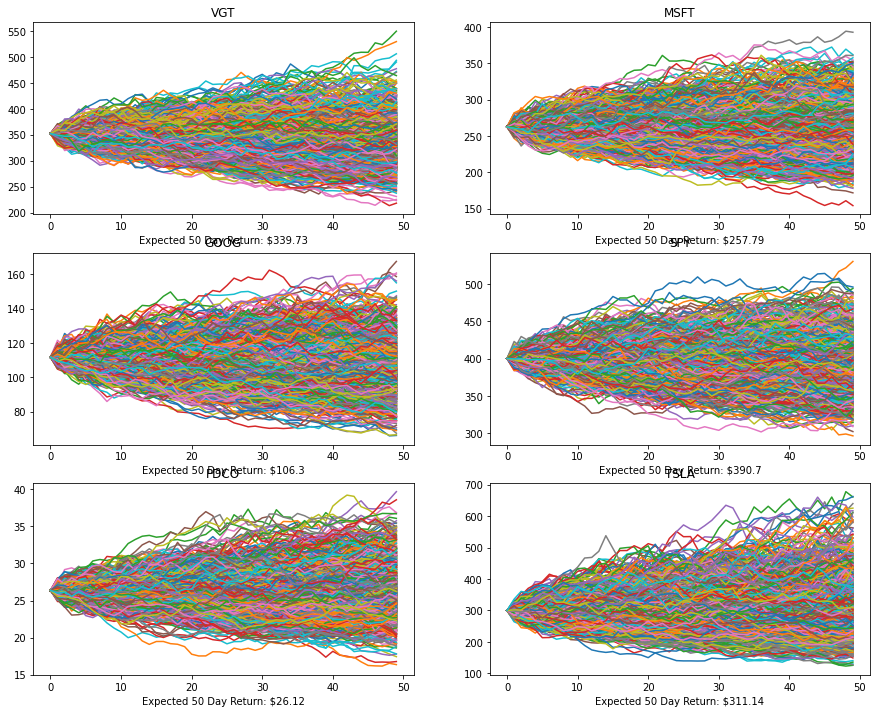

In [3]:
numPeriods = 50
numSimulations = 1000

tickers = ['VGT', 'MSFT', 'GOOG', 'SPY', 'PDCO', 'TSLA']
dailyReturns = fetchData(tickers, start='2021-09-01', end='2022-09-11')
returns = computeParameters(dailyReturns, numPeriods, numSimulations, tickers)
monteCarloSim(returns, dailyReturns)